In [1]:
# import modules
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

In [2]:
# we will create our own dataset for this lab
# first set up a random seed
np.random.seed(0)

In [3]:
# use the make_blobs class to make random clusters of points
# we will specify the following inputs:
# - the total number of points equally divided among clusters = 5000
# - the number of centers to generate, or the fixed center locations = [[4, 4], [-2, -1], [2, -3],[1,1]]
# - the standard deviation of the clusters = 0.9
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

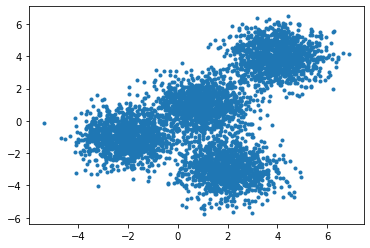

In [4]:
# display the scatter plot of the randomly generated data
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [5]:
# initialise k-means clustering with k = 4
# the k-means++ argument selects initial cluster centres in a smart way to speed up convergence
# run the iteration 12 times with different centroid seeds.  The final result will be the best output in terms of inertia
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [6]:
# fit the k-means model with the feature matrix we created above, X
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [7]:
# grab the labels for each point in the model
k_means_labels = k_means.labels_
k_means_labels

array([1, 2, 2, ..., 3, 1, 1])

In [8]:
# get the coordinates of the centroids
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 0.96959198,  0.98543802],
       [-2.03375169, -0.99827293],
       [ 1.99876902, -3.01796355],
       [ 3.97334234,  3.98758687]])

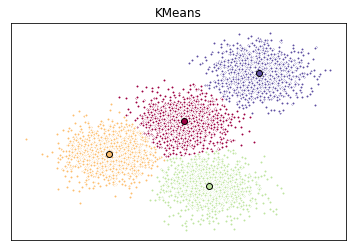

In [9]:
# create the visual plot
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


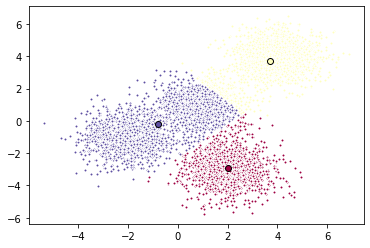

In [10]:
# now try to cluster the above dataset into 3 clusters
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()